# README.md

###For each pt with an ADT ending date, find its T date and T value around 6months later

# Step1, read from spreadsheet, clean up, and get statistics

In [2]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [9]:
df1=pd.read_csv("bigcohort_bothok_new.csv", header=0)
df1.fillna('', inplace=True)
df1['inital_ADT_end_date'] = pd.to_datetime(df1['inital_ADT_end_date'])

df2=pd.read_excel("pca_tresults_20210119_BP.xlsx", header=0)
#df3=pd.read_csv("just_start_empty.csv", header=0)

In [10]:
df1[:1]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [11]:
df2[:1]

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351


In [12]:
list_pts_adt_table=df1["person_id"].to_list()
list_pts_tvalue_table=df2["person_id"].to_list()

In [13]:
print("pt number in adt table is:")
print(len(list_pts_adt_table))
print("")
print("pt number in t value table is:")
print(len(list_pts_tvalue_table))

pt number in adt table is:
940

pt number in t value table is:
18643


In [14]:
index_list=df2.columns
index_list

Index(['person_id', 'cancer_type_id', 'year_of_diagnosis',
       'month_of_diagnosis', 'day_of_diagnosis', 'dx_date', 'result_date',
       'loinc_code', 'source_test_name', 'test_results'],
      dtype='object')

In [15]:
print(df2.shape)
#delete some useless columns
del_col=['cancer_type_id', 'year_of_diagnosis', 'month_of_diagnosis', 'day_of_diagnosis', 'dx_date','loinc_code', 'source_test_name']

for col in del_col:
    del df2[col]
print(df2.shape)

(18643, 10)
(18643, 3)


In [16]:
y=2

df1_pt=df1[(df1["person_id"] == y)]
df2_pt=df2[(df2["person_id"] == y)]

In [17]:
df1_pt

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,2,2009-02-26,2017-02-01,2897 days 00:00:00.000000000,2897.0,0


In [18]:
df2_pt

,person_id,result_date,test_results
0,2,2006-09-05,351
1,2,2007-01-09,304
2,2,2007-05-17,259
3,2,2007-06-12,382
4,2,2007-06-28,439
...,...,...,...
77,2,2017-02-01,15.64
78,2,2017-02-22,7.72
79,2,2017-03-18,11.29
80,2,2017-03-22,11.14


In [19]:
tvalue=df2_pt.loc[df2_pt['result_date'] == ('2017-02-01 00:00:00')]

In [20]:
test=df2_pt[:1].test_results.values[0]
test

351

In [21]:
def closest(lst, K): 
      return lst[min(range(len(lst)), key = lambda i: abs(lst[i] - K))] 

In [22]:
y=2
df1_pt=df1[(df1["person_id"] == y)]
a=df1_pt['inital_ADT_end_date'].to_list()[0]
a

Timestamp('2017-02-01 00:00:00')

In [23]:
a_plus_6mons=a + timedelta(days=180)

In [24]:
a_plus_6mons

Timestamp('2017-07-31 00:00:00')

In [25]:
df2_pt=df2[(df2["person_id"] == 2)]    
each_pt_tdates = df2_pt['result_date'].to_list()
#each_pt_tdates

In [26]:
result_list=[]

#for y in list_pts:      
for y in [2]:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    a_plus_6mons=a + timedelta(days=180)
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    
    start_sorted_bin=sorted(cleaned_aaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        tdate=closest(start_sorted_bin,a_plus_6mons)
        #tvalue=df2_pt.loc[df['result_date'] == tdate].test_result
    
    #pick up T-value for T-date
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]
    
    print(y, a, gap, a_plus_6mons, tdate, tvalue)
    result_per_pt=[y, a, gap, a_plus_6mons, tdate, tvalue]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-07-31 00:00:00 2017-04-11 00:00:00 4.8


In [27]:
#do it for all pts in the list
#get t values as well
#only keep those within 5-7 months

In [29]:
result_list=[]

#for y in list_pts:      
for y in list_pts_adt_table:
    
    df1_pt=df1[(df1["person_id"] == y)]
    a=df1_pt['inital_ADT_end_date'].to_list()[0]
    #add 6 months to the inital ADT end date
    a_plus_6mons=a + timedelta(days=180)
    #pick up initial ADT window 
    gap=df1_pt['Inital_ADT_time_window_days'].to_list()[0] 
    
    df2_pt=df2[(df2["person_id"] == y)]    
    each_pt_tdates = df2_pt['result_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    
    start_sorted_bin=sorted(cleaned_aaa)
    
    if(len(start_sorted_bin)==0):
        tdate='NaN'  

    if(len(start_sorted_bin)>0):
        #apply the closet function
        tdate=closest(start_sorted_bin,a_plus_6mons)
    
    #pick up Tvalue for Tdate
    df2_pt_pick=df2_pt[(df2_pt['result_date']==tdate)]
    tvalue=df2_pt_pick.test_results.values[0]

    print(y, a, gap, a_plus_6mons, tdate, tvalue)
    result_per_pt=[y, a, gap, a_plus_6mons, tdate,  tvalue]
    result_list.append(result_per_pt)

2 2017-02-01 00:00:00 2897.0 2017-07-31 00:00:00 2017-04-11 00:00:00 4.8
13 2018-05-17 00:00:00 2891.0 2018-11-13 00:00:00 2017-12-14 00:00:00 <4.33
18 2014-03-13 00:00:00 121.0 2014-09-09 00:00:00 2014-12-02 00:00:00 31.3
22 2017-04-24 00:00:00 2401.0 2017-10-21 00:00:00 2012-11-07 00:00:00 19.45
25 2014-02-18 00:00:00 98.0 2014-08-17 00:00:00 2015-02-18 00:00:00 149.89
26 2016-06-01 00:00:00 553.0 2016-11-28 00:00:00 2016-09-14 00:00:00 13.53
37 2016-09-02 00:00:00 2165.0 2017-03-01 00:00:00 2016-09-27 00:00:00 14.74
38 2016-07-18 00:00:00 243.0 2017-01-14 00:00:00 2017-01-20 00:00:00 18.85
81 2014-04-01 00:00:00 188.0 2014-09-28 00:00:00 2014-05-15 00:00:00 <10.00
95 2014-04-23 00:00:00 1204.0 2014-10-20 00:00:00 2014-04-28 00:00:00 <10.00
119 2013-10-02 00:00:00 92.0 2014-03-31 00:00:00 2014-02-12 00:00:00 <10.00
125 2020-09-02 00:00:00 1682.0 2021-03-01 00:00:00 2020-08-19 00:00:00 135.35
132 2016-07-13 00:00:00 457.0 2017-01-09 00:00:00 2016-10-20 00:00:00 8.41
137 2015-06-01 00:

6237 2020-11-13 00:00:00 1130.0 2021-05-12 00:00:00 2017-05-08 00:00:00 592.7
6241 2011-11-29 00:00:00 222.0 2012-05-27 00:00:00 2012-08-30 00:00:00 37.79
6268 2020-01-15 00:00:00 84.0 2020-07-13 00:00:00 2020-06-24 00:00:00 <3
6405 2017-12-28 00:00:00 273.0 2018-06-26 00:00:00 2017-08-31 00:00:00 18.09
6445 2016-11-01 00:00:00 334.0 2017-04-30 00:00:00 2017-05-17 00:00:00 552.52
6475 2017-03-24 00:00:00 1242.0 2017-09-20 00:00:00 2017-09-15 00:00:00 12.51
6542 2011-04-15 00:00:00 324.0 2011-10-12 00:00:00 2012-11-09 00:00:00 260.46
6656 2016-12-29 00:00:00 192.0 2017-06-27 00:00:00 2017-07-25 00:00:00 78
6794 2019-06-01 00:00:00 58.0 2019-11-28 00:00:00 2019-08-16 00:00:00 13.68
6841 2020-08-24 00:00:00 3248.0 2021-02-20 00:00:00 2020-01-29 00:00:00 <3
6846 2019-01-08 00:00:00 1407.0 2019-07-07 00:00:00 2019-02-21 00:00:00 4.87
6894 2014-10-15 00:00:00 3848.0 2015-04-13 00:00:00 2015-04-13 00:00:00 <10.00
6933 2019-07-15 00:00:00 1260.0 2020-01-11 00:00:00 2017-02-13 00:00:00 12.3
695

12898 2020-02-21 00:00:00 1360.0 2020-08-19 00:00:00 2016-08-03 00:00:00 25.76
12947 2020-09-14 00:00:00 1229.0 2021-03-13 00:00:00 2019-11-27 00:00:00 5.93
12948 2013-10-21 00:00:00 453.0 2014-04-19 00:00:00 2013-05-06 00:00:00 18.86
13074 2015-05-06 00:00:00 405.0 2015-11-02 00:00:00 2015-05-06 00:00:00 <10.00
13078 2013-11-12 00:00:00 63.0 2014-05-11 00:00:00 2014-10-16 00:00:00 213.29
13166 2015-06-09 00:00:00 210.0 2015-12-06 00:00:00 2015-06-09 00:00:00 12
13170 2017-09-05 00:00:00 140.0 2018-03-04 00:00:00 2018-02-09 00:00:00 25
13189 2019-09-16 00:00:00 726.0 2020-03-14 00:00:00 2019-09-16 00:00:00 11
13258 2018-11-12 00:00:00 462.0 2019-05-11 00:00:00 2018-12-12 00:00:00 <4.33
13274 2018-08-28 00:00:00 147.0 2019-02-24 00:00:00 2019-02-22 00:00:00 236
13452 2013-03-01 00:00:00 876.0 2013-08-28 00:00:00 2012-12-06 00:00:00 324.25
13469 2018-10-01 00:00:00 171.0 2019-03-30 00:00:00 2018-07-09 00:00:00 8
13507 2020-09-19 00:00:00 603.0 2021-03-18 00:00:00 2020-06-22 00:00:00 <3
1

19373 2020-09-14 00:00:00 824.0 2021-03-13 00:00:00 2018-12-14 00:00:00 10.11
19438 2013-02-06 00:00:00 238.0 2013-08-05 00:00:00 2012-11-15 00:00:00 <10.00
19461 2016-10-31 00:00:00 476.0 2017-04-29 00:00:00 2016-02-29 00:00:00 <12.98
19466 2019-10-15 00:00:00 342.0 2020-04-12 00:00:00 2019-12-04 00:00:00 10.25
19537 2014-01-15 00:00:00 119.0 2014-07-14 00:00:00 2014-01-08 00:00:00 <10.00
19539 2019-08-20 00:00:00 1275.0 2020-02-16 00:00:00 2018-08-15 00:00:00 <3
19541 2011-05-09 00:00:00 280.0 2011-11-05 00:00:00 2012-02-06 00:00:00 19.69
19566 2020-10-20 00:00:00 1359.0 2021-04-18 00:00:00 2020-04-30 00:00:00 25.09
19567 2015-06-17 00:00:00 1766.0 2015-12-14 00:00:00 2013-06-06 00:00:00 <10.00
19579 2019-12-16 00:00:00 487.0 2020-06-13 00:00:00 2019-12-16 00:00:00 13.96
19735 2019-07-25 00:00:00 708.0 2020-01-21 00:00:00 2019-09-26 00:00:00 5.56
19917 2018-10-05 00:00:00 326.0 2019-04-03 00:00:00 2019-01-04 00:00:00 180.67
19919 2016-11-09 00:00:00 2826.0 2017-05-08 00:00:00 2016-11

25589 2018-05-04 00:00:00 207.0 2018-10-31 00:00:00 2019-01-04 00:00:00 234
25679 2015-02-12 00:00:00 529.0 2015-08-11 00:00:00 2014-05-01 00:00:00 <10.00
25732 2017-12-04 00:00:00 300.0 2018-06-02 00:00:00 2017-12-13 00:00:00 <4.33
25753 2014-04-10 00:00:00 464.0 2014-10-07 00:00:00 2013-03-27 00:00:00 <10.00
25809 2016-03-03 00:00:00 1942.0 2016-08-30 00:00:00 2016-05-19 00:00:00 14.37
25828 2020-03-18 00:00:00 2569.0 2020-09-14 00:00:00 2020-03-18 00:00:00 29.97
25830 2020-06-10 00:00:00 679.0 2020-12-07 00:00:00 2020-01-15 00:00:00 <4.33
25837 2020-09-29 00:00:00 1254.0 2021-03-28 00:00:00 2015-11-12 00:00:00 421.25
25861 2015-09-14 00:00:00 199.0 2016-03-12 00:00:00 2016-04-25 00:00:00 345.8
25871 2018-08-27 00:00:00 101.0 2019-02-23 00:00:00 2018-10-15 00:00:00 <4.33
25882 2015-06-01 00:00:00 726.0 2015-11-28 00:00:00 2015-09-23 00:00:00 14.23
25886 2016-01-20 00:00:00 89.0 2016-07-18 00:00:00 2016-08-17 00:00:00 178.42
26071 2015-04-27 00:00:00 91.0 2015-10-24 00:00:00 2015-09-1

31839 2019-10-29 00:00:00 91.0 2020-04-26 00:00:00 2020-01-24 00:00:00 14.03
31894 2020-01-29 00:00:00 3066.0 2020-07-27 00:00:00 2020-01-29 00:00:00 491.13
31918 2014-12-01 00:00:00 214.0 2015-05-30 00:00:00 2016-03-04 00:00:00 270.1
31921 2016-03-22 00:00:00 91.0 2016-09-18 00:00:00 2016-08-09 00:00:00 8.29
31927 2016-10-05 00:00:00 89.0 2017-04-03 00:00:00 2016-10-05 00:00:00 15.47
31933 2020-09-29 00:00:00 1142.0 2021-03-28 00:00:00 2017-06-29 00:00:00 439
32081 2016-03-15 00:00:00 1678.0 2016-09-11 00:00:00 2016-03-15 00:00:00 9.54
32113 2014-08-13 00:00:00 1472.0 2015-02-09 00:00:00 2014-09-15 00:00:00 12.1
32116 2019-09-24 00:00:00 785.0 2020-03-22 00:00:00 2019-12-10 00:00:00 <3
32191 2017-11-01 00:00:00 1575.0 2018-04-30 00:00:00 2014-04-02 00:00:00 <10.00
32230 2019-06-22 00:00:00 1596.0 2019-12-19 00:00:00 2020-01-13 00:00:00 161.53
32231 2019-06-22 00:00:00 1596.0 2019-12-19 00:00:00 2019-02-24 00:00:00 10.38
32277 2013-12-30 00:00:00 145.0 2014-06-28 00:00:00 2013-09-04 00

170341 2020-11-10 00:00:00 743.0 2021-05-09 00:00:00 2020-07-02 00:00:00 <4.33
170601 2019-12-27 00:00:00 119.0 2020-06-24 00:00:00 2020-03-18 00:00:00 6
170686 2020-09-29 00:00:00 196.0 2021-03-28 00:00:00 2020-06-25 00:00:00 11.63
170713 2019-06-07 00:00:00 88.0 2019-12-04 00:00:00 2019-09-13 00:00:00 7.7
171182 2019-08-02 00:00:00 239.0 2020-01-29 00:00:00 2019-09-09 00:00:00 20.35
171226 2020-08-18 00:00:00 558.0 2021-02-14 00:00:00 2020-06-15 00:00:00 5
171240 2020-06-08 00:00:00 462.0 2020-12-05 00:00:00 2019-09-24 00:00:00 6.51
171441 2020-09-14 00:00:00 744.0 2021-03-13 00:00:00 2020-07-06 00:00:00 10.9
171442 2019-08-01 00:00:00 241.0 2020-01-28 00:00:00 2020-02-05 00:00:00 8.36
171741 2020-10-14 00:00:00 448.0 2021-04-12 00:00:00 2020-07-08 00:00:00 <4.33
171789 2020-09-21 00:00:00 476.0 2021-03-20 00:00:00 2020-06-30 00:00:00 15
172448 2020-04-02 00:00:00 196.0 2020-09-29 00:00:00 2020-03-09 00:00:00 19.37
173013 2020-02-13 00:00:00 93.0 2020-08-11 00:00:00 2020-05-14 00:00:

In [30]:
result_list

[[2,
  Timestamp('2017-02-01 00:00:00'),
  2897.0,
  Timestamp('2017-07-31 00:00:00'),
  Timestamp('2017-04-11 00:00:00'),
  4.8],
 [13,
  Timestamp('2018-05-17 00:00:00'),
  2891.0,
  Timestamp('2018-11-13 00:00:00'),
  Timestamp('2017-12-14 00:00:00'),
  '<4.33'],
 [18,
  Timestamp('2014-03-13 00:00:00'),
  121.0,
  Timestamp('2014-09-09 00:00:00'),
  Timestamp('2014-12-02 00:00:00'),
  31.3],
 [22,
  Timestamp('2017-04-24 00:00:00'),
  2401.0,
  Timestamp('2017-10-21 00:00:00'),
  Timestamp('2012-11-07 00:00:00'),
  19.45],
 [25,
  Timestamp('2014-02-18 00:00:00'),
  98.0,
  Timestamp('2014-08-17 00:00:00'),
  Timestamp('2015-02-18 00:00:00'),
  149.89],
 [26,
  Timestamp('2016-06-01 00:00:00'),
  553.0,
  Timestamp('2016-11-28 00:00:00'),
  Timestamp('2016-09-14 00:00:00'),
  13.53],
 [37,
  Timestamp('2016-09-02 00:00:00'),
  2165.0,
  Timestamp('2017-03-01 00:00:00'),
  Timestamp('2016-09-27 00:00:00'),
  14.74],
 [38,
  Timestamp('2016-07-18 00:00:00'),
  243.0,
  Timestamp('201

In [31]:
df_results=pd.DataFrame(result_list)
df_results.columns=(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days', '6 mons after ADT', 'Tdate closest to 6 mons after ADT', "Tvalue"])

In [32]:
#create a column for the time gap to screen the ones outside the 5mons to 7 mons window  
df_results['Tvalue_ADT+6mons_gap'] = df_results['Tdate closest to 6 mons after ADT'] - df_results['6 mons after ADT']
#create a column for the inital adt use window as days
df_results['Tvalue_ADT+6mons_gap_days']=df_results['Tvalue_ADT+6mons_gap'].dt.days

In [33]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,2,2017-02-01,2897.0,2017-07-31,2017-04-11,4.8,-111 days,-111
1,13,2018-05-17,2891.0,2018-11-13,2017-12-14,<4.33,-334 days,-334
2,18,2014-03-13,121.0,2014-09-09,2014-12-02,31.3,84 days,84
3,22,2017-04-24,2401.0,2017-10-21,2012-11-07,19.45,-1809 days,-1809
4,25,2014-02-18,98.0,2014-08-17,2015-02-18,149.89,185 days,185
...,...,...,...,...,...,...,...,...
935,200563,2020-07-06,89.0,2021-01-02,2020-07-06,23,-180 days,-180
936,201026,2020-10-01,128.0,2021-03-30,2020-05-26,151,-308 days,-308
937,203209,2020-11-01,151.0,2021-04-30,2020-06-30,32.63,-304 days,-304
938,203736,2020-10-14,99.0,2021-04-12,2020-07-06,823,-280 days,-280


In [44]:
df_results.to_csv("940cohort_Tdate_Tvalue_ADTwindow_closest_to_6mons_after_ADT_ends.csv", encoding='utf-8', index=False)

In [52]:
df_results_select2.to_csv("144cohort_Tdate_Tvalue_ADTwindow_closest_to_6mons_after_ADT_ends.csv", encoding='utf-8', index=False)

In [53]:
df_results_select1=df_results[(df_results["Tvalue_ADT+6mons_gap_days"] <= 30)]
df_results_select2=df_results_select1[(df_results_select1["Tvalue_ADT+6mons_gap_days"] >= -30)]
print(len(df_results))
print(len(df_results_select1))
print(len(df_results_select2))

940
851
144


In [42]:
df_results

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,2,2017-02-01,2897.0,2017-07-31,2017-04-11,4.8,-111 days,-111
1,13,2018-05-17,2891.0,2018-11-13,2017-12-14,<4.33,-334 days,-334
2,18,2014-03-13,121.0,2014-09-09,2014-12-02,31.3,84 days,84
3,22,2017-04-24,2401.0,2017-10-21,2012-11-07,19.45,-1809 days,-1809
4,25,2014-02-18,98.0,2014-08-17,2015-02-18,149.89,185 days,185
...,...,...,...,...,...,...,...,...
935,200563,2020-07-06,89.0,2021-01-02,2020-07-06,23,-180 days,-180
936,201026,2020-10-01,128.0,2021-03-30,2020-05-26,151,-308 days,-308
937,203209,2020-11-01,151.0,2021-04-30,2020-06-30,32.63,-304 days,-304
938,203736,2020-10-14,99.0,2021-04-12,2020-07-06,823,-280 days,-280


In [54]:
#pts cohort with T date and values within the window of 5 mons to 7 mons after inital ADT ends
df_results_select2

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
7,38,2016-07-18,243.0,2017-01-14,2017-01-20,18.85,6 days,6
15,267,2016-05-12,359.0,2016-11-08,2016-10-17,11.54,-22 days,-22
20,386,2017-02-01,148.0,2017-07-31,2017-08-29,88,29 days,29
21,387,2018-08-21,84.0,2019-02-17,2019-02-13,299,-4 days,-4
22,776,2018-10-01,76.0,2019-03-30,2019-03-15,8.67,-15 days,-15
...,...,...,...,...,...,...,...,...
868,177207,2020-04-27,202.0,2020-10-24,2020-10-12,468.86,-12 days,-12
870,178232,2020-01-31,100.0,2020-07-29,2020-07-13,35,-16 days,-16
892,183348,2018-11-01,178.0,2019-04-30,2019-04-25,<4.33,-5 days,-5
907,187363,2019-06-19,138.0,2019-12-16,2019-11-25,6.07,-21 days,-21


In [ ]:
#Fix the T values that contain <; plot the histograms and make the presentation slides

In [165]:
###Need to fix this later

#df_results_select3=df_results_select2
#df_results_select3['Tvalue'][ind].str[1:]
#fixed_string_list=[]
#for ind in df_results_select2.index:
 
#    if (df_results_select3['Tvalue'][ind].str.contains('<')): 
#        fixed_string_list.append(ind)  
#        df_results_select3['Tvalue'][ind]=df_results_select3['Tvalue'][ind].str[1:]

#df_results_select3.loc[df_results_select3['Tvalue'].str.contains('<'), '<']=""
#s[1:]

In [ ]:
#plot the histograms and make the slides; 30 mins for each
#statistics
#logic #results #crosscheck 

In [64]:
df5=pd.read_csv("940cohort_Tdate_fixed_Tvalue_ADTwindow_closest_to_6mons_after_ADT_ends.csv", header=0)
df4=pd.read_csv("144cohort_Tdate_fixed_Tvalue_ADTwindow_closest_to_6mons_after_ADT_ends.csv", header=0)

In [65]:
df4[:4]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,6 mons after ADT,Tdate closest to 6 mons after ADT,Tvalue,Tvalue_ADT+6mons_gap,Tvalue_ADT+6mons_gap_days
0,38,7/18/16,243,1/14/17,1/20/17,18.85,6 days 00:00:00.000000000,6
1,267,5/12/16,359,11/8/16,10/17/16,11.54,-22 days +00:00:00.000000000,-22
2,386,2/1/17,148,7/31/17,8/29/17,88.00,29 days 00:00:00.000000000,29
3,387,8/21/18,84,2/17/19,2/13/19,299.00,-4 days +00:00:00.000000000,-4


In [67]:
index_list=df4.columns
index_list

Index(['person_id', 'inital_ADT_end_date', 'Inital_ADT_time_window_days',
       '6 mons after ADT', 'Tdate closest to 6 mons after ADT', 'Tvalue',
       'Tvalue_ADT+6mons_gap', 'Tvalue_ADT+6mons_gap_days'],
      dtype='object')

In [68]:
#delete some columns
print(df4.shape)    
del_col=['6 mons after ADT','Tvalue_ADT+6mons_gap', 'Tvalue_ADT+6mons_gap_days']
for col in del_col:
    del df4[col]
print(df4.shape)

(144, 8)
(144, 5)


In [69]:
df4[:5]

,person_id,inital_ADT_end_date,Inital_ADT_time_window_days,Tdate closest to 6 mons after ADT,Tvalue
0,38,7/18/16,243,1/20/17,18.85
1,267,5/12/16,359,10/17/16,11.54
2,386,2/1/17,148,8/29/17,88.00
3,387,8/21/18,84,2/13/19,299.00
4,776,10/1/18,76,3/15/19,8.67


index                           143
Inital_ADT_time_window_days    5442
dtype: int64
index                           0
Inital_ADT_time_window_days    10
dtype: int64


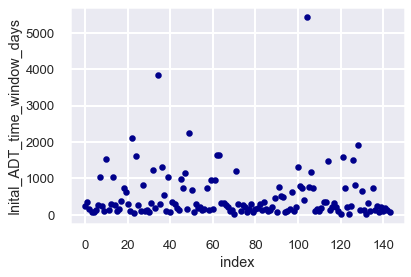

In [70]:
gap = df4[["Inital_ADT_time_window_days"]].reset_index()
ax=gap.plot.scatter(x= "index", y="Inital_ADT_time_window_days", c='DarkBlue')
print(gap.max())
print(gap.min())

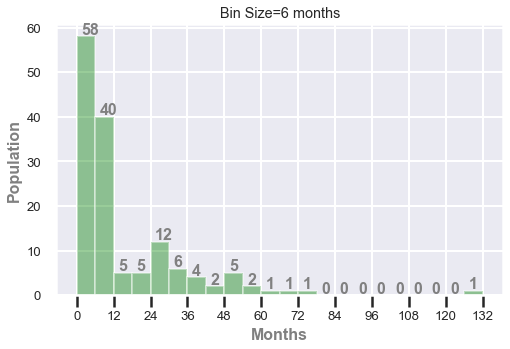

In [71]:
###plot the ADT window histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 4000, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(gap["Inital_ADT_time_window_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 4000, 360))
ax.set_xticklabels(np.arange(0, 133, 12))


# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()


index      143.00
Tvalue    1083.86
dtype: float64
index     0.00
Tvalue    2.64
dtype: float64


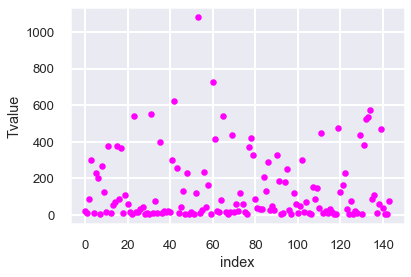

In [77]:
Tvalue = df4[["Tvalue"]].reset_index()
ax=Tvalue.plot.scatter(x= "index", y="Tvalue", c='Magenta')
print(Tvalue.max())
print(Tvalue.min())

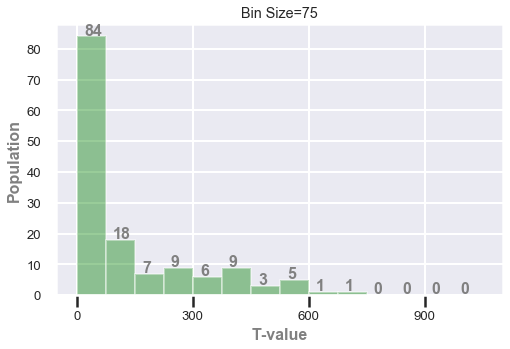

In [83]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=75

bins=np.arange(0, 1100, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(Tvalue["Tvalue"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Bin Size="+ str(int(binsize)))
plt.xlabel("T-value", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1100, 300))
ax.set_xticklabels(np.arange(0, 1100, 300))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()



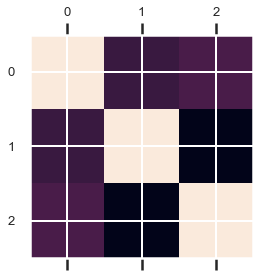

In [84]:
Correlation = df4[["Inital_ADT_time_window_days","Tvalue"]].reset_index()
plt.matshow(Correlation.corr())

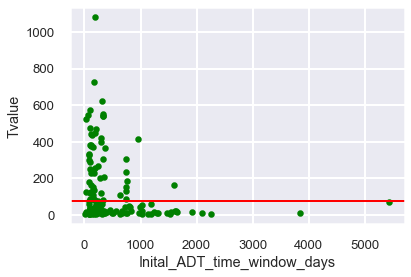

In [85]:
ax=Correlation.plot.scatter(x= "Inital_ADT_time_window_days", y="Tvalue", c='green')
plt.axhline(y=75, color='r', linestyle='-')